In [1]:
import numpy as np

In [2]:
num_points = 1000
vectors_set = []

for i in xrange(num_points) :
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


* 이 코드는 __y = 0.1 * x + 0.3__ 관계를 가지는 데이터를 생성
* __numpy의 정규분포 함수__를 사용하였으며 약간의 변동값을 더해 직선과 완전히 일치하게 하지는 않음  

![텍스트](http://cfile8.uf.tistory.com/image/230AF740588EA783191149)



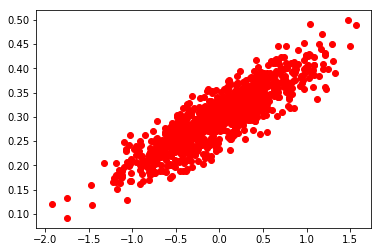

In [3]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

* matplotlib가 필요함
> pip install matplotlib

In [4]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -0.1, -0.1))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# init = tf.global_variables_initializer()
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

In [5]:
for step in xrange(8) :
    sess.run(train)
    print sess.run(W), sess.run(b)

[-0.04389367] [ 0.29999202]
[-0.00312239] [ 0.30006495]
[ 0.02622159] [ 0.30011803]
[ 0.04734109] [ 0.30015621]
[ 0.06254126] [ 0.30018368]
[ 0.07348115] [ 0.30020347]
[ 0.08135483] [ 0.30021772]
[ 0.08702169] [ 0.30022797]


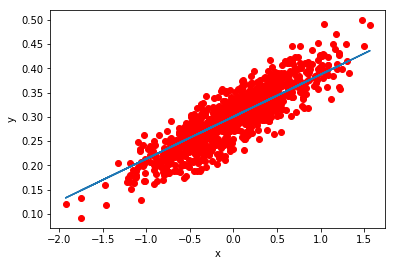

In [6]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

0 [ 0.09110025] [ 0.30023533]


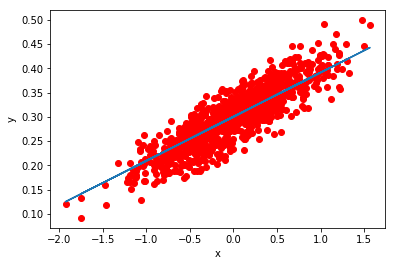

1 [ 0.09403568] [ 0.30024067]


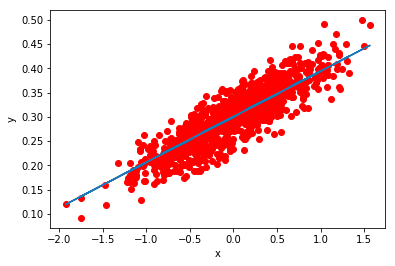

2 [ 0.09614837] [ 0.30024448]


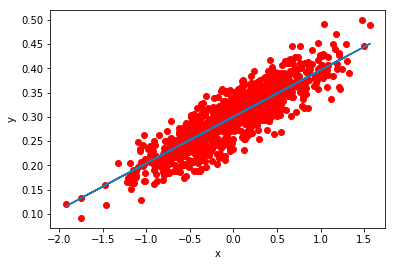

3 [ 0.09766892] [ 0.30024722]


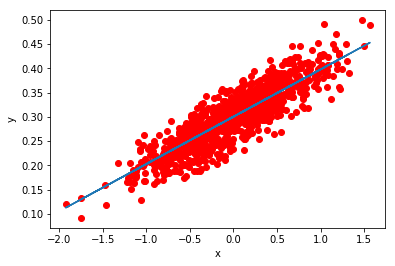

4 [ 0.09876329] [ 0.30024919]


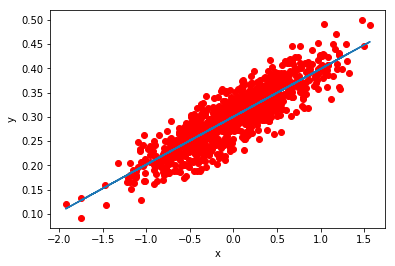

5 [ 0.09955094] [ 0.30025062]


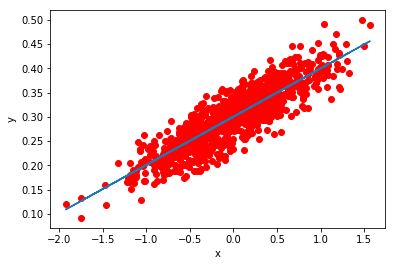

6 [ 0.10011782] [ 0.30025166]


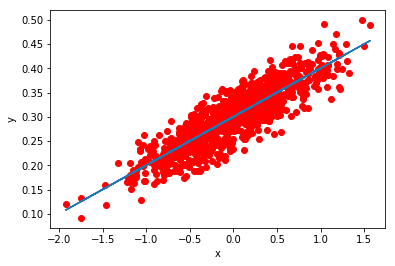

7 [ 0.10052583] [ 0.30025238]


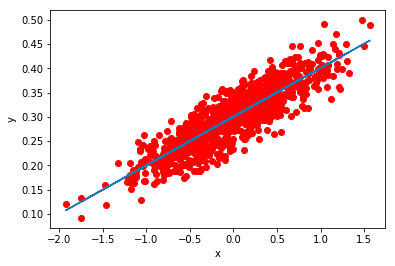

In [7]:
for step in xrange(8) :
    sess.run(train)
    print step, sess.run(W), sess.run(b)
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()